In [1]:
# Loading the previously saved Keras model
from keras.models import load_model 
model = load_model("my_model.keras")

In [2]:
# Loading the previously saved training history from the JSON file for analysis or plotting
import json

with open("history.json", "r") as f:
    my_history_load = json.load(f)

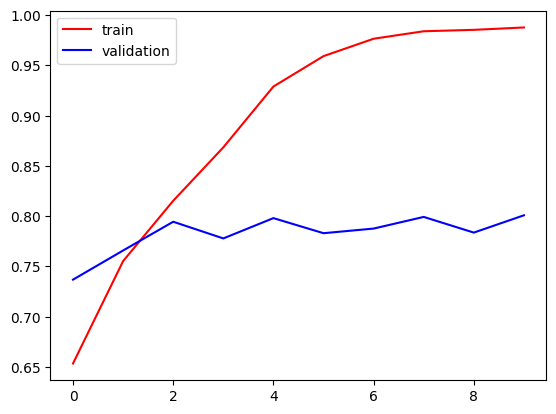

In [3]:
# Importing matplotlib.pyplot for Plotting the comparison between accuracy & val_accuracy
import matplotlib.pyplot as plt

plt.plot(my_history_load['accuracy'],color='red', label='train')
plt.plot(my_history_load['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

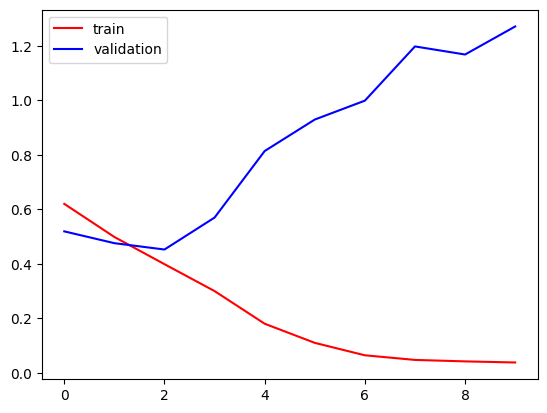

In [4]:
# Plotting the comparison between loss & val_loss
plt.plot(my_history_load['loss'],color='red', label='train')
plt.plot(my_history_load['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

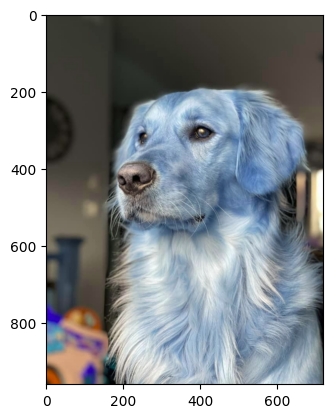

In [5]:
# Importing OpenCV along with matplotlib.pyplot(if not imported)
import cv2

# Read an image from file & Displaying the image using matplotlib
my_testing_img = cv2.imread("dog_img.jpg")
plt.imshow(my_testing_img)

### Note: OpenCV reads images in BGR format however matplotlib expects RGB format, so colors may appear incorrect unless converted.

In [6]:
# Checking the dimensions of the loaded image (height, width, channels)
my_testing_img.shape

(960, 720, 3)

In [7]:
# Resize the loaded image to (256, 256) because the model was trained with this input size
my_testing_img = cv2.resize(my_testing_img,(256,256))    #This ensures the input shape is compatible with the neural network

In [8]:
# Checking the dimensions of the loaded image again to see the changes made(height, width, channels)
my_testing_img.shape

(256, 256, 3)

In [9]:
# Reshaping the image to (1, 256, 256, 3) because Keras models expect a batch of images
# 1 = batch size (single image)
# 256x256 = height and width
# 3 = number of color channels (RGB)
my_testing_img_input = my_testing_img.reshape((1,256,256,3))

In [10]:
# Making a prediction on our input image using the trained model
model.predict(my_testing_img_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[1.]], dtype=float32)

##### Since, we know that 0 is for cat & 1 is for dog.
##### Here, we got 1 which means the image is dog & the model has predicted correctly

In [11]:
# EXTRA SUGGESTION(IF YOU WANT YOUR PREDICITION TO CLASSIFY CAT OR DOG NAME ITSELF BASED ON PREDICTED OUTPUT THEN,)

# Defining class labels for binary classification
# 0 index= 'cat', 1 index= 'dog' (based on how the model was trained by us)
class_labels = ['cat', 'dog']

# Make a prediction on the preprocessed input image
prediction = model.predict(my_testing_img_input)

# The model outputs a probability between 0 and 1
# Use rounding to get the predicted class index (0 or 1)
predicted_class_index = int(round(prediction[0][0]))

# Getting the readable class label using the predicted index
predicted_label = class_labels[predicted_class_index]

# Print the prediction
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted label: dog
